In [13]:
import torch
import matplotlib.pyplot as plt

# Exo 1

In [26]:

dtype = torch.float
device = torch.device("cpu")

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 1000, 1, 10, 1

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = 3*x+2

# 0) Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
b = torch.randn(1, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-5
for t in range(10001):
    # 1) Forward pass: compute predicted y
    z = x.mm(w1)+b.repeat(N,1)
    z_relu = z.clamp(min=0)
    y_pred = z_relu.mm(w2)

    # 2) Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 500 == 0:
         print(t, loss)

    # 3) Backpropagate to compute gradients of w1, w2 and b with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = z_relu.t().mm(grad_y_pred)


    grad_z_relu = grad_y_pred.mm(w2.t())
    grad_z = grad_z_relu.clone()
    grad_z[z < 0] = 0
    grad_w1 = x.t().mm(grad_z)

    grad_b = grad_z.sum(0)

    # 4) Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    b -= learning_rate * grad_b

0 3975.0068359375
500 0.7472437620162964
1000 0.274189293384552
1500 0.20752796530723572
2000 0.17695754766464233
2500 0.15560978651046753
3000 0.13823115825653076
3500 0.12079612910747528
4000 0.1049441397190094
4500 0.08883682638406754
5000 0.07380762696266174
5500 0.06143219769001007
6000 0.05122602730989456
6500 0.0432414673268795
7000 0.036988645792007446
7500 0.0320805162191391
8000 0.02812265232205391
8500 0.024929936975240707
9000 0.022230233997106552
9500 0.019787952303886414
10000 0.017656007781624794


On remarque que malgré une initialisation aléatoire des poids, le reseau de neuronne apprend bien la fonction tel que la valeur moyenne de la fonction de coût descend toujours progressivement sous les 0.5

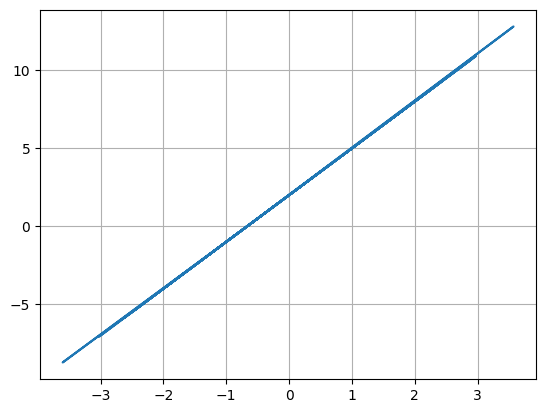

tensor([[0.0000, 2.0000, 2.0001],
        [0.0526, 2.1579, 2.1580],
        [0.1053, 2.3158, 2.3162],
        [0.1579, 2.4737, 2.4741],
        [0.2105, 2.6316, 2.6321],
        [0.2632, 2.7895, 2.7900],
        [0.3158, 2.9474, 2.9480],
        [0.3684, 3.1053, 3.1059],
        [0.4211, 3.2632, 3.2639],
        [0.4737, 3.4211, 3.4218],
        [0.5263, 3.5789, 3.5798],
        [0.5789, 3.7368, 3.7377],
        [0.6316, 3.8947, 3.8955],
        [0.6842, 4.0526, 4.0532],
        [0.7368, 4.2105, 4.2110],
        [0.7895, 4.3684, 4.3687],
        [0.8421, 4.5263, 4.5265],
        [0.8947, 4.6842, 4.6842],
        [0.9474, 4.8421, 4.8420],
        [1.0000, 5.0000, 4.9997]])


In [28]:
# 5) Examining the learnt function
M = 20
x_test = torch.linspace(0,1,M).unsqueeze(1)
x_test = x_test.repeat(1,D_in)

z_test = x_test.mm(w1)+b.repeat(M,1)
z_relu_test = z_test.clamp(min=0)
y_pred_test = z_relu_test.mm(w2)

plt.grid()
plt.plot(list(x[:,0]), list(y_pred[:,0]))
plt.show()

y_test = 3*x_test + 2

print(torch.cat((x_test,y_test,y_pred_test), 1))

On remarque que les prédictions sont vraiment fidèle aux vraies valeur de la fonction (au centième près)

# Exo 2

La fonction de cout utilisée est la somme des erreurs quadratiques (carré de l'équart entre valeur prédite et valeur réelle)

# Exo 3
<img src="ResNeuronne.jpg" width="500">

# Exo 4

Chacune des N entrées dans X(x1, .., xn) passe dans tout les neuronnes N(n1, .., n10) et chacun est multiplié à son propre poids w1.i tq W1(w1.1, .., w1.10) , ils sont ensuite respectivement additionnés avec le même biais b. Apres application de la fonction d'activations, chaque sortie est multipliée à son propre poids w2.i tq W2(w2.1, .., w2.10), toutes ces sorties sont ensuite additionnées entre elles pour obtenir une sortie yi de Y(y1, .., yn)

X : (N, Din)\
W1 : (Din, H)\
XW1 : (N, Din)@(Din, H) = (N, H)\
B : (1, H)\
Transformation en Brepeat : (N, H)\
Z = XW1 + Brepeat : (N, H)\
ZReLU garde la même shape : (N, H)\
W2 : (H, Dout)\
Y= ZReLU * W2 : (N, H)@(H, Dout) = (N, Dout)

# Exo 5